#**PROJECT 2**
#**FASTAG FRAUD DETECTCION**

#The dataset contains the following columns:

**Transaction_ID:** Unique identifier for each transaction

**Timestamp:** Date and time of the transaction

**Vehicle_Type:** Type of vehicle (Bus, Car, Motorcycle, Truck, Van)

**FastagID:** Unique identifier for the Fastag

**TollBoothID:** Identifier for the toll booth

**Lane_Type:** Type of lane (Express, Regular)

**Vehicle_Dimensions:** Size of the vehicle (Large, Medium, Small)

**Transaction_Amount:** Amount charged for the transaction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/FastagFraudDetection.csv')
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

In [ ]:
df['FastagID'].head()

0    FTG-001-ABC-121
1    FTG-002-XYZ-451
2                NaN
3    FTG-044-LMN-322
4    FTG-505-DEF-652
Name: FastagID, dtype: object

In [ ]:
#to determine unique values
for i in df.columns:
  print(i,":\n",df[i].unique())

Transaction_ID :
 [   1    2    3 ... 4998 4999 5000]
Timestamp :
 ['1/6/2023 11:20' '1/7/2023 14:55' '1/8/2023 18:25' ... '2/5/2023 5:08'
 '2/20/2023 20:34' '3/10/2023 0:59']
Vehicle_Type :
 ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
FastagID :
 ['FTG-001-ABC-121' 'FTG-002-XYZ-451' nan ... 'FTG-447-PLN-109'
 'FTG-458-VFR-876' 'FTG-459-WSX-543']
TollBoothID :
 ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Lane_Type :
 ['Express' 'Regular']
Vehicle_Dimensions :
 ['Large' 'Small' 'Medium']
Transaction_Amount :
 [350 120   0 140 160 180 290 110 100 130  60 150 340 300  70 115 145 330
  90 125]
Amount_paid :
 [120 100   0 160  90 180 350 140 110  60 290 130  70 190 150 340  80 300
  50 115 145 330 125]
Geographical_Location :
 ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
Vehicle_Speed :
 [ 65  78  53  92  60 105  70 

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()


Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [ ]:
df['FastagID'].value_counts()

FastagID
FTG-730-DEF-250    2
FTG-758-VFR-876    2
FTG-729-QAZ-543    2
FTG-359-WSX-593    2
FTG-507-JKL-109    2
                  ..
FTG-222-NOP-567    1
FTG-455-QRS-890    1
FTG-688-TUV-123    1
FTG-921-WXY-456    1
FTG-459-WSX-543    1
Name: count, Length: 4451, dtype: int64

In [ ]:
# Feature Engineering
# Convert Timestamp to datetime and extract features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df.drop(['Timestamp'], axis=1, inplace=True)

In [ ]:
#Drop Vehicle_Plate_Number if it's not crucial
df.drop('Vehicle_Plate_Number', axis=1, inplace=True)
df.drop('FastagID', axis=1, inplace=True)
df.drop('TollBoothID', axis=1, inplace=True)
df.drop('Geographical_Location',inplace=True ,axis=1)

In [ ]:
df.head()

,Transaction_ID,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Year,Month,Day,Hour
0,1,Bus,Express,Large,350,120,65,Fraud,2023,1,6,11
1,2,Car,Regular,Small,120,100,78,Fraud,2023,1,7,14
2,3,Motorcycle,Regular,Small,0,0,53,Not Fraud,2023,1,8,18
3,4,Truck,Regular,Large,350,120,92,Fraud,2023,1,9,2
4,5,Van,Express,Medium,140,100,60,Fraud,2023,1,10,6


In [ ]:
#encode all the categorical columns lane_Type vehicle tupe vehicle dimension

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Lane_Type'] = le.fit_transform(df['Lane_Type'])
df['Vehicle_Type'] = le.fit_transform(df['Vehicle_Type'])
df['Vehicle_Dimensions'] = le.fit_transform(df['Vehicle_Dimensions'])

df.head()


,Transaction_ID,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Year,Month,Day,Hour
0,1,0,0,0,350,120,65,Fraud,2023,1,6,11
1,2,1,1,2,120,100,78,Fraud,2023,1,7,14
2,3,2,1,2,0,0,53,Not Fraud,2023,1,8,18
3,4,5,1,0,350,120,92,Fraud,2023,1,9,2
4,5,6,0,1,140,100,60,Fraud,2023,1,10,6


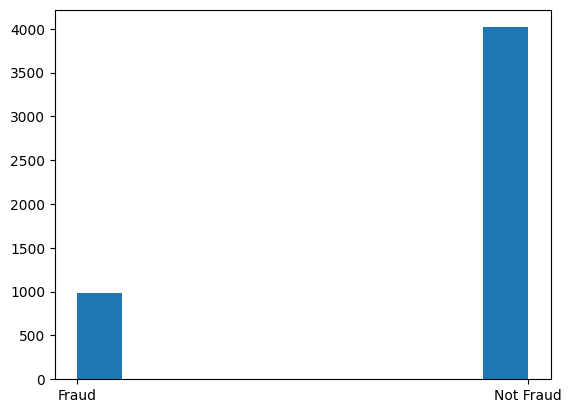

In [ ]:
#checking the distribution of target column
plt.hist(df['Fraud_indicator'])
plt.show()

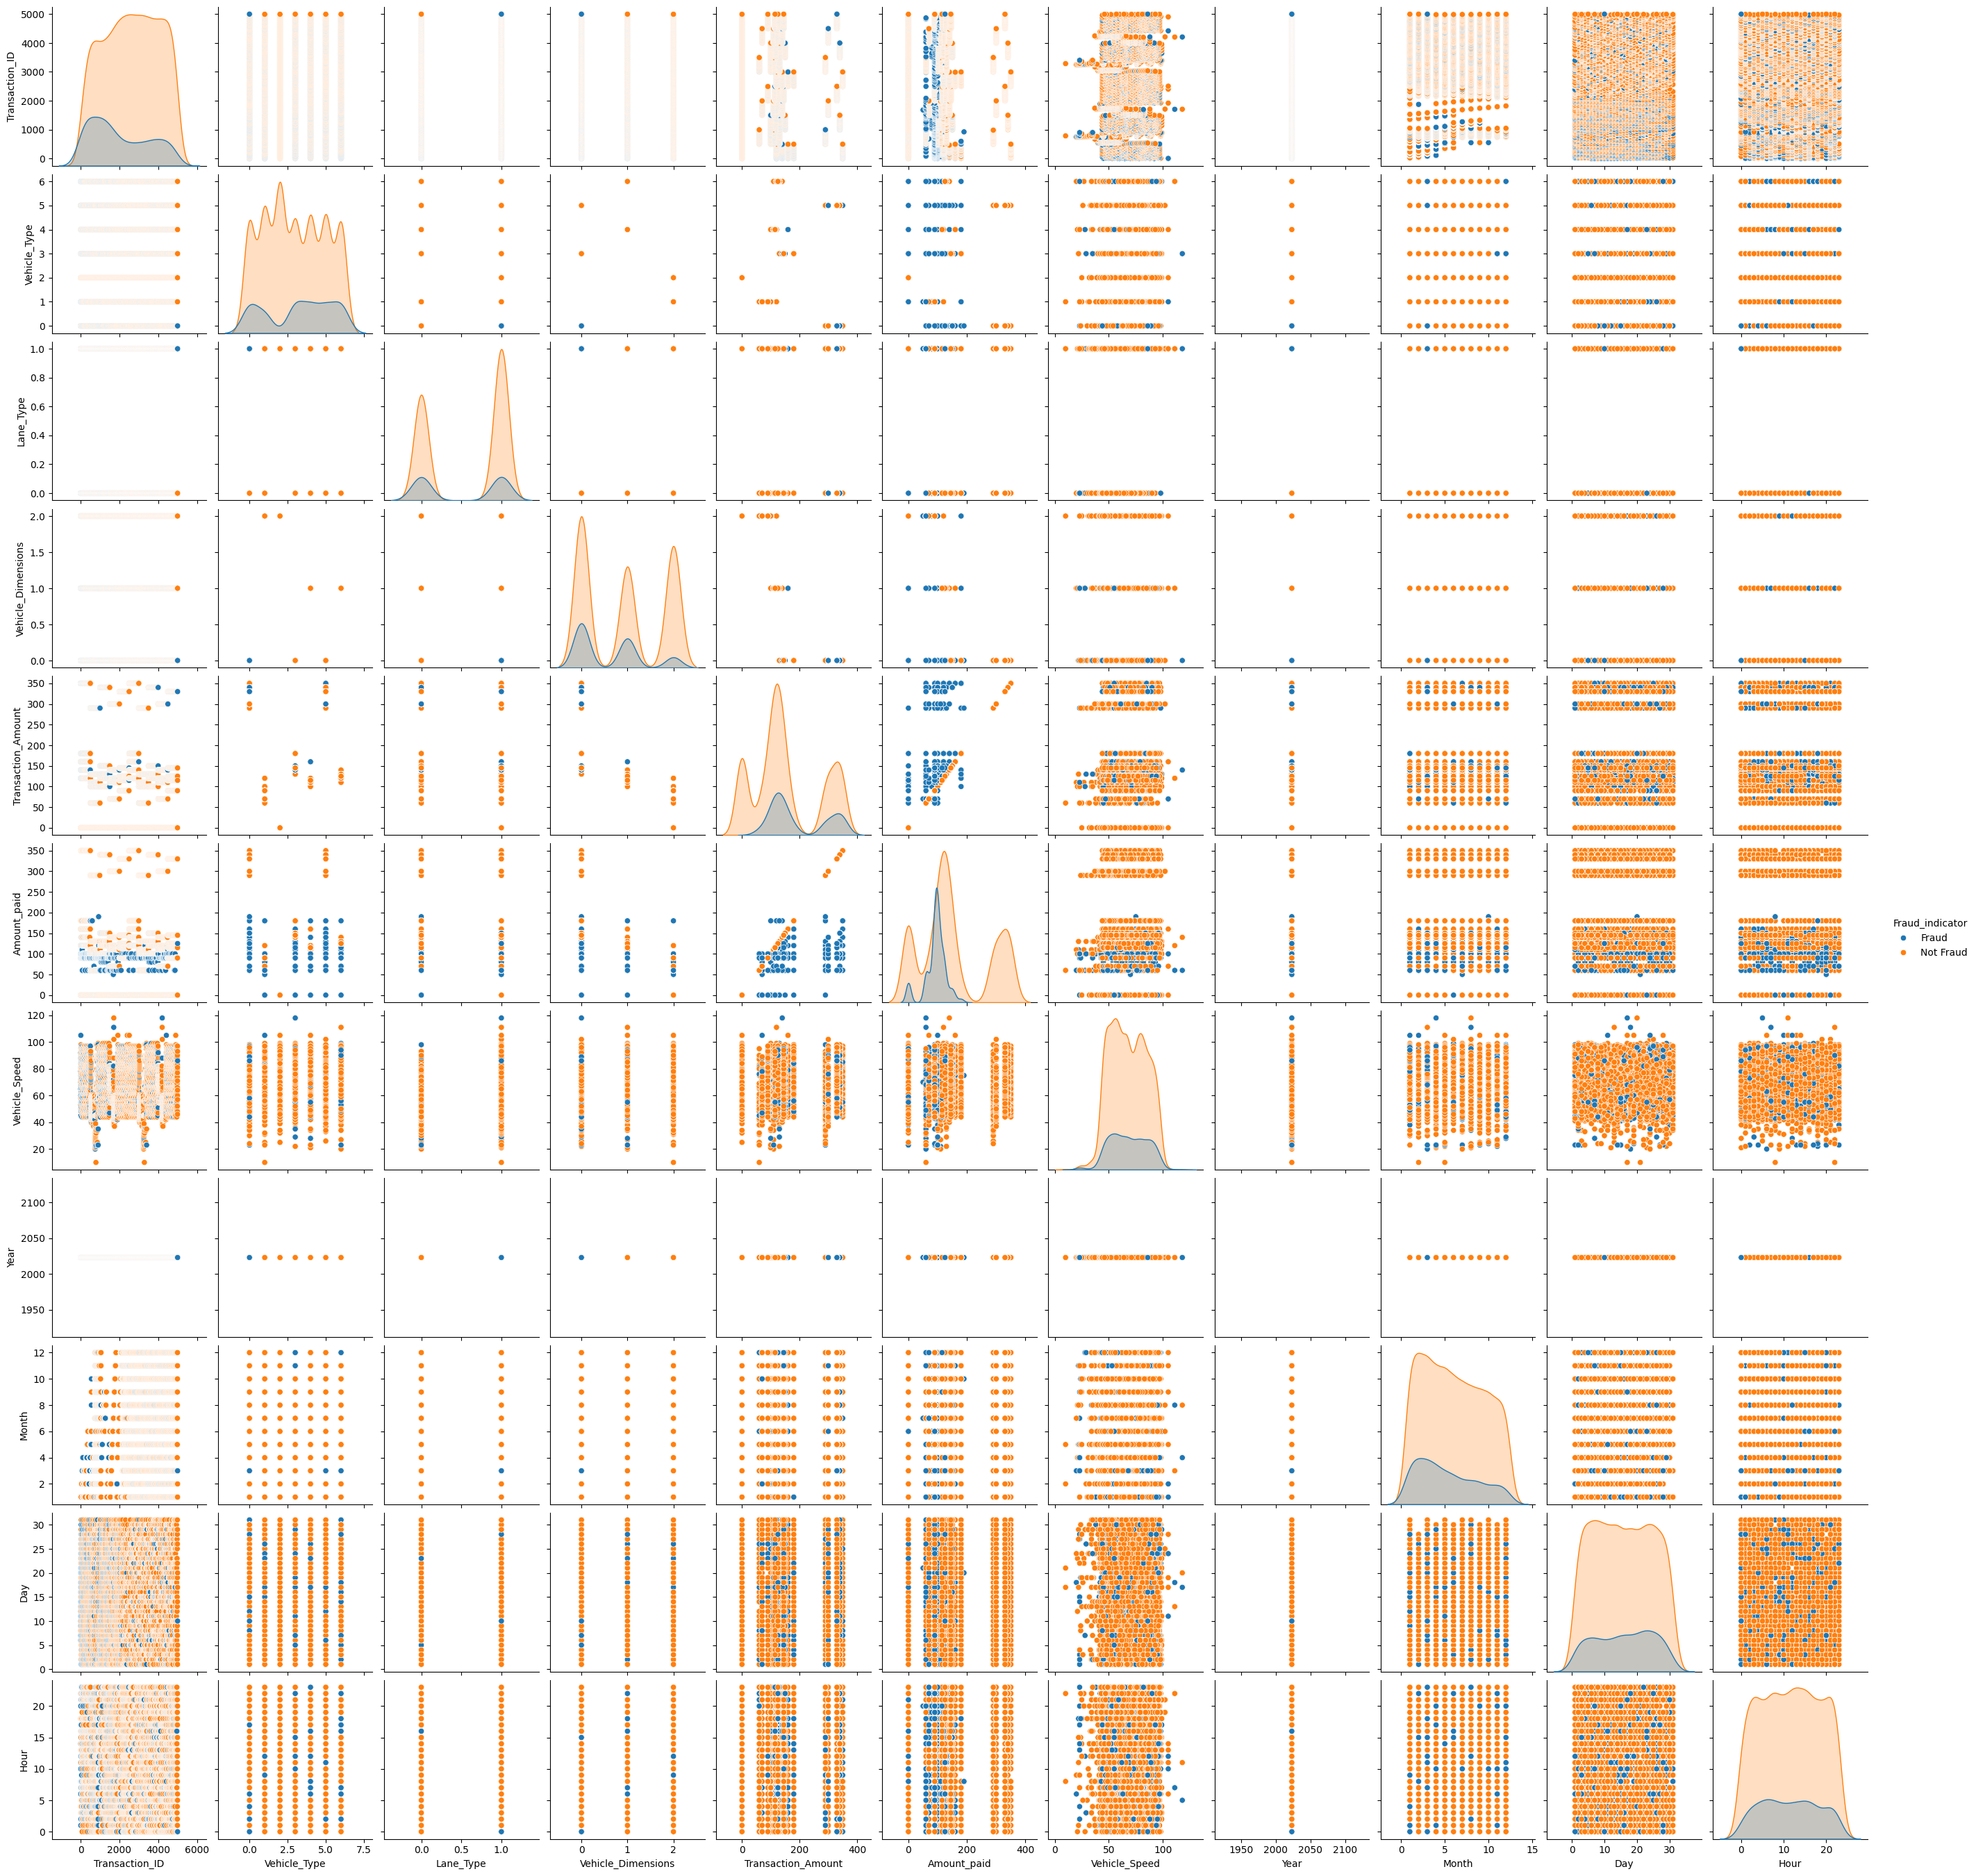

In [ ]:
sns.pairplot(df,hue='Fraud_indicator')
plt.show()

In [ ]:
# Selecting the numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()
corr_matrix

,Transaction_ID,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Year,Month,Day,Hour
Transaction_ID,1.000000,0.000420,0.000200,-0.000713,-0.023515,0.044433,0.014378,NaN,0.260075,0.025353,-0.023208
Vehicle_Type,0.000420,1.000000,-0.072443,-0.170768,-0.002920,0.026815,0.001091,NaN,0.001232,-0.019744,0.002718
Lane_Type,0.000200,-0.072443,1.000000,0.198572,-0.206345,-0.194581,0.473801,NaN,0.005537,-0.001529,-0.008947
Vehicle_Dimensions,-0.000713,-0.170768,0.198572,1.000000,-0.829794,-0.735284,-0.011784,NaN,0.005086,0.009744,0.046978
Transaction_Amount,-0.023515,-0.002920,-0.206345,-0.829794,1.000000,0.870078,0.053229,NaN,-0.019824,-0.009679,-0.036980
Amount_paid,0.044433,0.026815,-0.194581,-0.735284,0.870078,1.000000,0.039027,NaN,0.018105,-0.010837,-0.026358
Vehicle_Speed,0.014378,0.001091,0.473801,-0.011784,0.053229,0.039027,1.000000,NaN,0.015349,0.002616,-0.002259
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.260075,0.001232,0.005537,0.005086,-0.019824,0.018105,0.015349,NaN,1.000000,0.031188,0.001041
Day,0.025353,-0.019744,-0.001529,0.009744,-0.009679,-0.010837,0.002616,NaN,0.031188,1.000000,0.002318


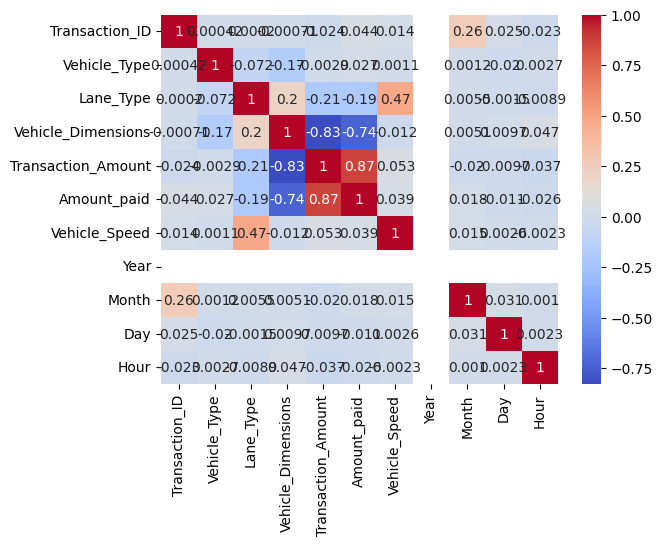

In [ ]:
#heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Separate features and target variable
x = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

In [ ]:
df.dtypes

Transaction_ID         int64
Vehicle_Type           int64
Lane_Type              int64
Vehicle_Dimensions     int64
Transaction_Amount     int64
Amount_paid            int64
Vehicle_Speed          int64
Fraud_indicator       object
Year                   int32
Month                  int32
Day                    int32
Hour                   int32
dtype: object

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)
y_resampled.value_counts()

Fraud_indicator
Fraud        4017
Not Fraud    4017
Name: count, dtype: int64

In [ ]:
from collections import Counter
print("Before Smote :",Counter(y))
print("After Smote :",Counter(y_resampled))

Before Smote : Counter({'Not Fraud': 4017, 'Fraud': 983})
After Smote : Counter({'Fraud': 4017, 'Not Fraud': 4017})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30)
x_train

,Transaction_ID,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Year,Month,Day,Hour
6833,1525,6,0,1,120,71,65,2023,1,21,17
7260,3629,5,1,0,340,137,96,2023,2,12,13
3014,3015,5,0,0,290,110,91,2023,4,22,2
5621,3815,5,0,0,340,150,59,2023,10,20,1
7256,546,3,0,0,130,100,60,2023,8,19,11
...,...,...,...,...,...,...,...,...,...,...,...
5914,247,6,1,1,140,118,85,2023,1,18,4
5508,2016,3,0,0,142,120,80,2023,8,23,16
3071,3072,6,1,1,110,110,57,2023,12,8,16
7967,920,1,0,2,60,0,68,2023,3,18,17


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
clf=GridSearchCV(model,param,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
knn=KNeighborsClassifier(n_neighbors=3,weights='uniform')
naiv=BernoulliNB()
svm=SVC()
tree=DecisionTreeClassifier(criterion='entropy')
regn=LogisticRegression(penalty='l2')
lst=[knn,naiv,svm,tree,regn]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for j in lst:
  print(j)
  print('_'*100)
  j.fit(x_train,y_train)
  y_pred=j.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=3)
____________________________________________________________________________________________________
0.8747407714641228
[[1089  115]
 [ 187 1020]]
              precision    recall  f1-score   support

       Fraud       0.85      0.90      0.88      1204
   Not Fraud       0.90      0.85      0.87      1207

    accuracy                           0.87      2411
   macro avg       0.88      0.87      0.87      2411
weighted avg       0.88      0.87      0.87      2411

BernoulliNB()
____________________________________________________________________________________________________
0.7801742015761095
[[922 282]
 [248 959]]
              precision    recall  f1-score   support

       Fraud       0.79      0.77      0.78      1204
   Not Fraud       0.77      0.79      0.78      1207

    accuracy                           0.78      2411
   macro avg       0.78      0.78      0.78      2411
weighted avg       0.78      0.78      0.78      2411

SVC()


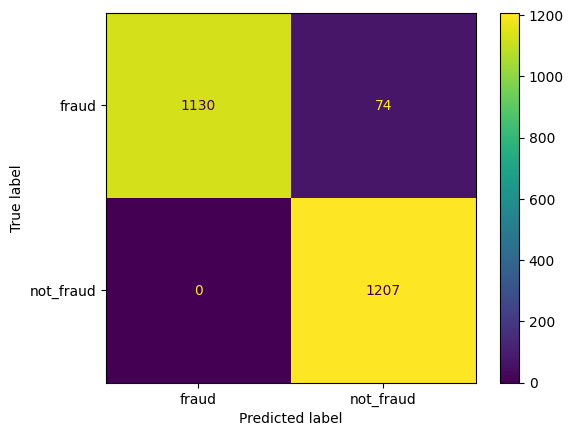

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
label = ['fraud', 'not_fraud']
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

#**The DecisionTreeClassifier stands out as the top-performing model, achieving the highest accuracy score.**